## Preproccesing Data (Extracting Data)
### Meteorite Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)

print("Number of observations: " + str(df_meteorite.shape[0]))
df_meteorite.head()

Number of observations: 38116


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [32]:
# Read Natural Disaster data
# ND = Natural Disaster
df_ndisaster = pd.read_csv("natural_disaster.csv")
df_ndisaster.shape

(48390, 16)

In [33]:
# Create new dateframe with only necessary columns
df_ndisaster = pd.DataFrame({'Year':df_ndisaster['Incident Begin Date'],
                   'Incident Type':df_ndisaster['Incident Type'], 
                   'Title':df_ndisaster['Title'],
                   'Declared County':df_ndisaster['Declared County/Area']})

df_ndisaster['Year'] = (pd.to_datetime(df_ndisaster['Year'])).dt.year
# drop any row with NAN value
df_ndisaster = df_ndisaster.dropna()

print("Number of observations: " + str(df_ndisaster.shape[0]))

df_ndisaster.head()

Number of observations: 48193


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


### <hr />

## Observing Data

### Observe number of natural disasters occured each year (1959 ~ 2012)

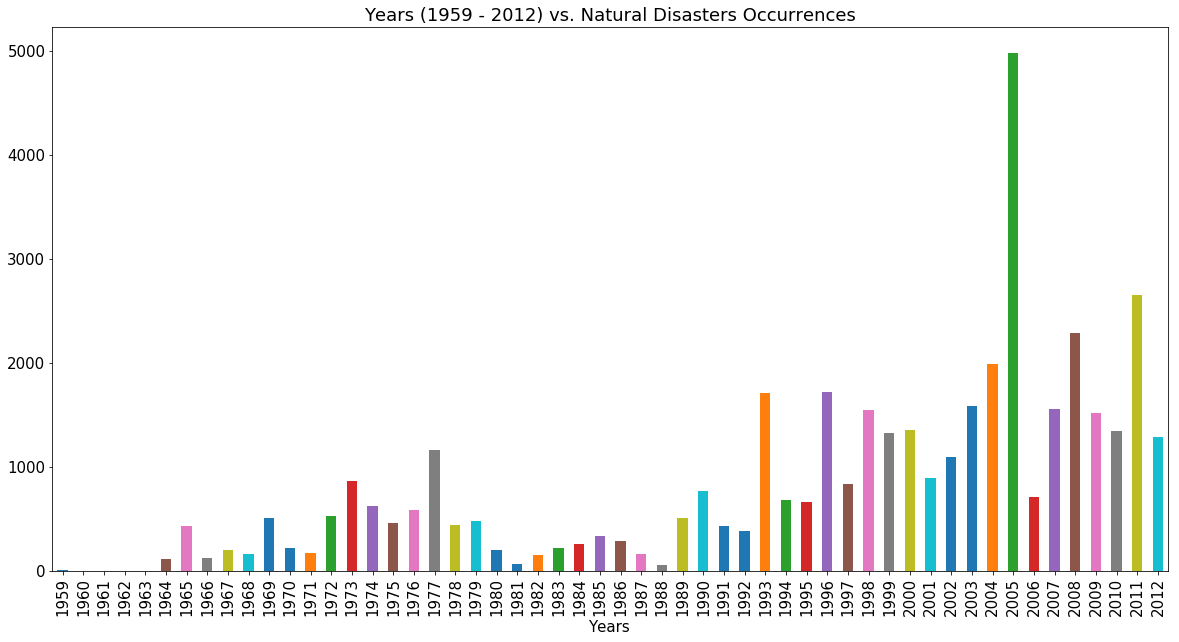

In [34]:
# Sort natural disaster data frame by type of disasters
df_ndisaster = df_ndisaster.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ndisaster['Year'].values

minYear = years[0]
maxYear = 2012
years_freq_nd = [0] * (maxYear - minYear + 1)

for x in years:
    if(x>maxYear):
        break
    years_freq_nd[x-minYear] = years_freq_nd[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

df_years_vs_nd = pd.DataFrame({'Years':years, 'Natural Disaster Occurrences':years_freq_nd})
df_years_vs_nd.plot(x='Years', y='Natural Disaster Occurrences', kind='bar', figsize=(20,10),
             title="Years (1959 - 2012) vs. Natural Disasters Occurrences", legend=False)

# df_years_vs_nd

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured each year (1959 ~ 2012)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

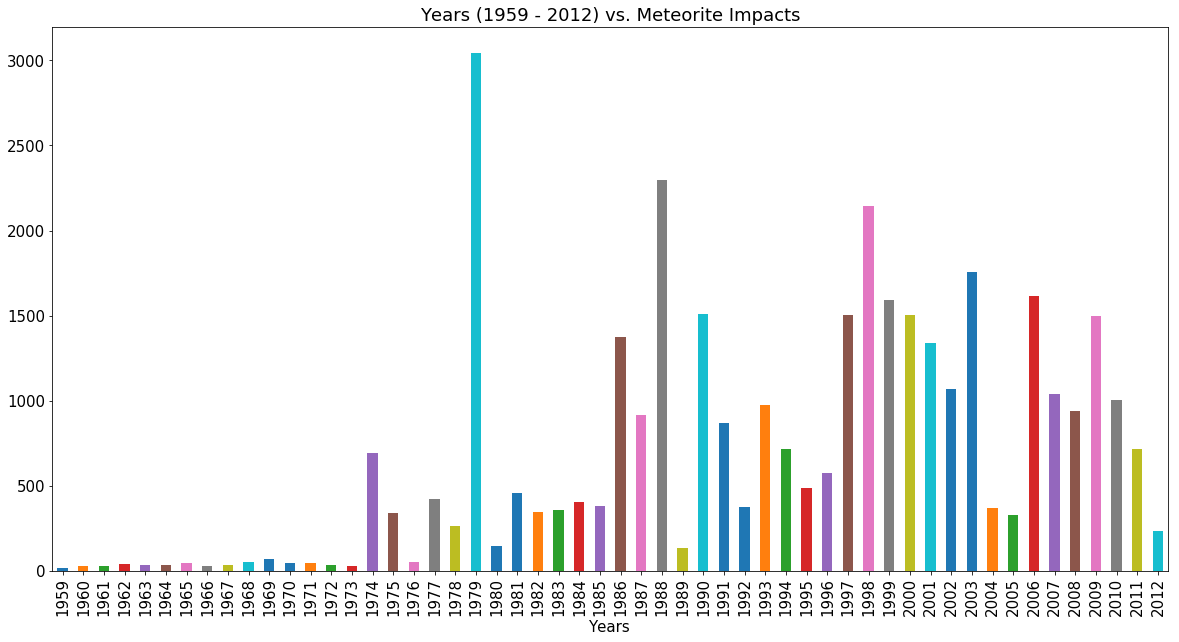

In [506]:
years_freq_meteo = [0] * (maxYear - minYear + 1)

for x in (pd.DataFrame({'Year':df_meteorite['year']})).values:
    if int(x) >= minYear and int(x) <= maxYear:
        years_freq_meteo[int(x)-minYear] = years_freq_meteo[int(x)-minYear] + 1

df_years_vs_meteo = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq_meteo})
df_years_vs_meteo.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2012) vs. Meteorite Impacts", legend=False)

## Plot NDO and MIO side by side

NDO : Natural Disaster Occurrences

MIO : Meteroite Impact Occurrences

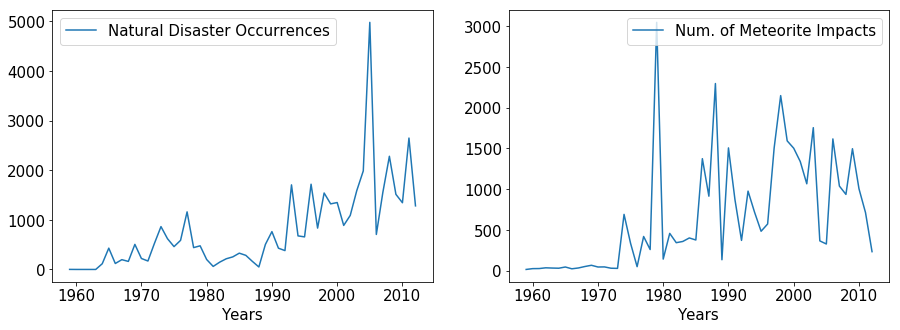

In [507]:
fig, axs = plt.subplots(1,2)

df_years_vs_nd.plot(ax=axs[0], x='Years', y='Natural Disaster Occurrences', kind='line', figsize=(15, 5))
df_years_vs_meteo.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 5))

# Geographic Plot

In [508]:
ndo = df_years_vs_nd[(df_years_vs_nd['Years'][:] >= 1959) & (df_years_vs_nd['Years'][:] <= 2013)]
# plt.loglog(df_years_vs_nd['Years'], ndo['Natural Disaster Occurence'], '.')

In [509]:
# type cast string year to int
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

# grab coulmns whose years are btwn 1959 and 2013
df_m = df_meteorite[(df_meteorite['year'][:] >= 1959) & (df_meteorite['year'][:] <= 2013)]

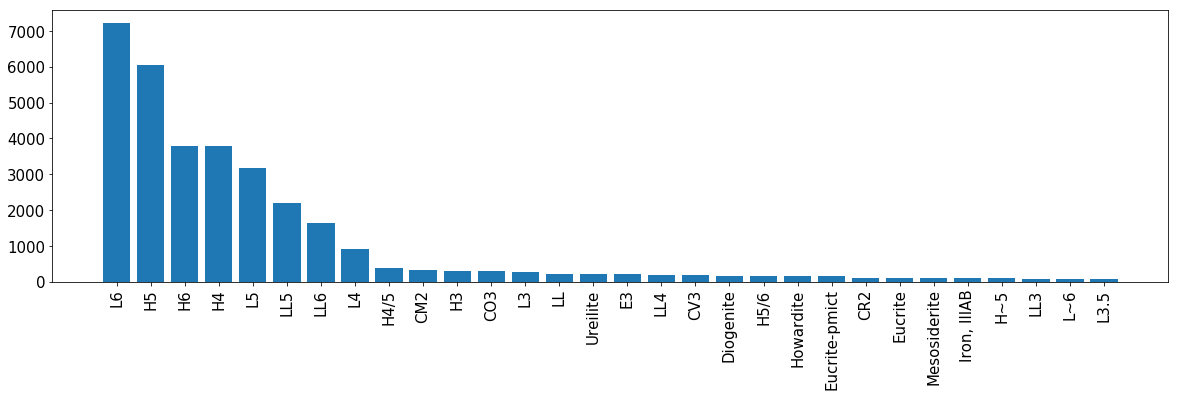

In [510]:
# plot meteorite classification
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

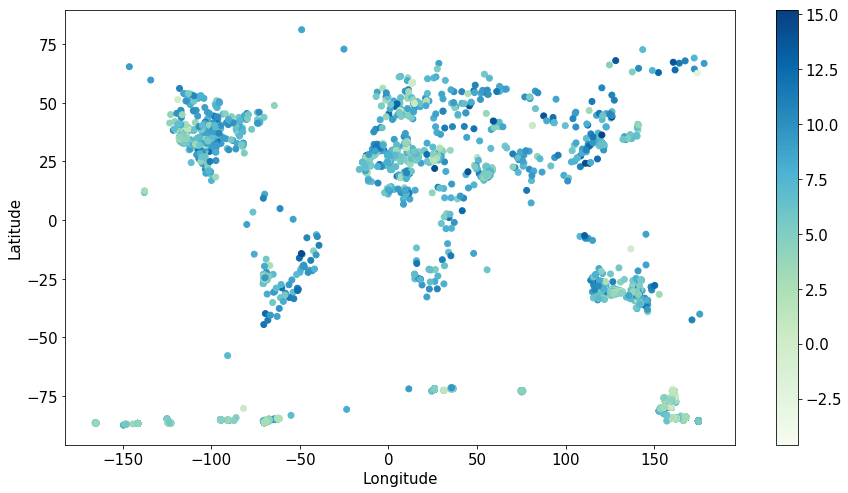

In [511]:
# remove reclong/reclat with value == 0
df_m = df_m[df_m['reclong'] != 0]
df_m = df_m[df_m['reclat'] != 0]
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]

color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Geographical Locations of Meteorite Landings by Mass (g)')
plt.show()

In [512]:
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]
# googled - splice region - USA
df_m = df_m[(df_m['reclong']<=-65) & (df_m['reclat']>=28) & (df_m['reclat']<=49)]
color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

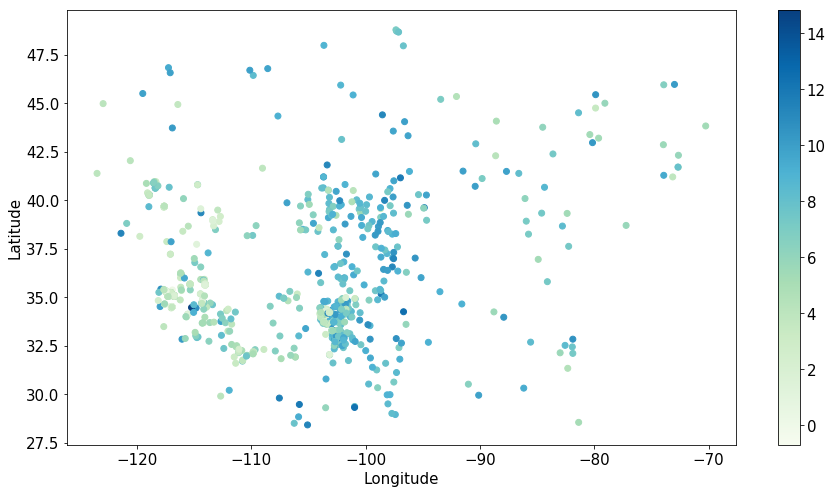

In [513]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Geographical Locations of Meteorite Landings by Mass (g)')
plt.show()

## Finalized DataFrame

In [521]:
df_final = pd.DataFrame({
        'years':df_years_vs_nd['Years'],
        'ndo':df_years_vs_nd['Natural Disaster Occurrences'],
        'mio':df_years_vs_meteo['Num. of Meteorite Impacts']})

avg_mass = []
max_mass = []
class_name = []
max_count = []

years = range(1959, 2013)
for year in years:
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==year].values))
    max_mass.append(max(df_m['mass (g)'][df_m['year']==year].values))
    max_count.append(df_m.recclass[df_m['year']==year].value_counts()[0])
    class_name.append(df_m.recclass[df_m['year']==year].value_counts().index[0])
    
df_final['class_name'] = pd.DataFrame({'class_name':class_name})
df_final['max_count'] = pd.DataFrame({'max_count':max_count})
df_final['avg_mass'] = pd.DataFrame({'avg_mass':avg_mass})
df_final['max_mass'] = pd.DataFrame({'max_mass':max_mass})

df_final.head()

df_final = df_final[:-1]
# years      -> years 1959~2013
# ndo        -> natural disaster occurence
# mio        -> meteorite impact occurence 
# class_name -> classified name of meteorite with most occurence in that year
# max_count  -> above meteorite's max occurence number
# avg_mass   -> average meteorite mass in that year
# max_mass   -> largest meteorite fell in that year
df_final.head()
fit = ols('ndo ~ max_mass', data = df_final).fit()
fit.pvalues

Intercept    6.023429e-08
max_mass     5.478248e-01
dtype: float64

## Data Simulation

### Fit a Simple Linear Regression: NDO vs. MIO

const    0.000938
mio      0.087315
dtype: float64


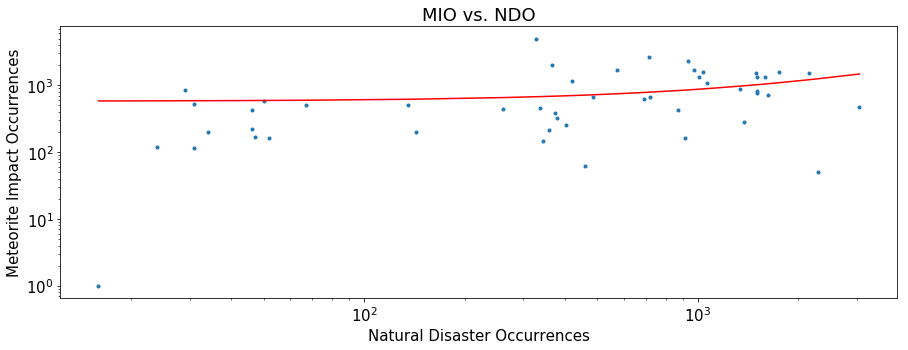

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

def graph(x, y):
    plt.figure(figsize=(15,5))
    plt.loglog(df_final[x], df_final[y], '.')
    return (df_final[x], df_final[y])
    
# scatter plot ndo vs mio
x, y = graph('mio', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('Meteorite Impact Occurrences')
plt.title('MIO vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') #add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Count

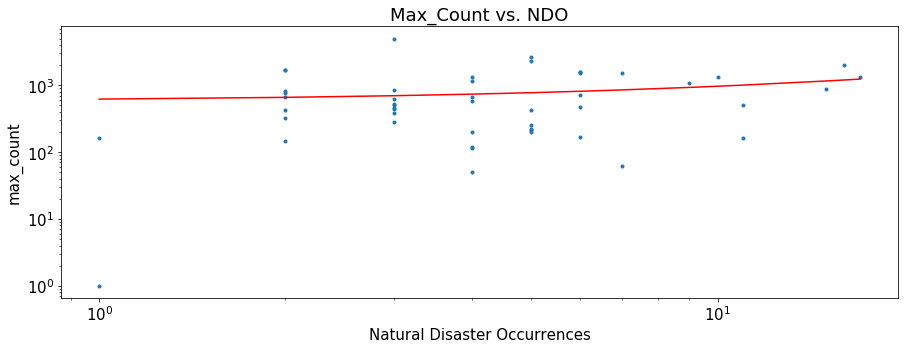

In [45]:
# scatter plot ndo vs max_count
x,y = graph('max_count', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('max_count')
plt.title('Max_Count vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Avg_Mass

const       5.810940e-08
avg_mass    2.722923e-01
dtype: float64


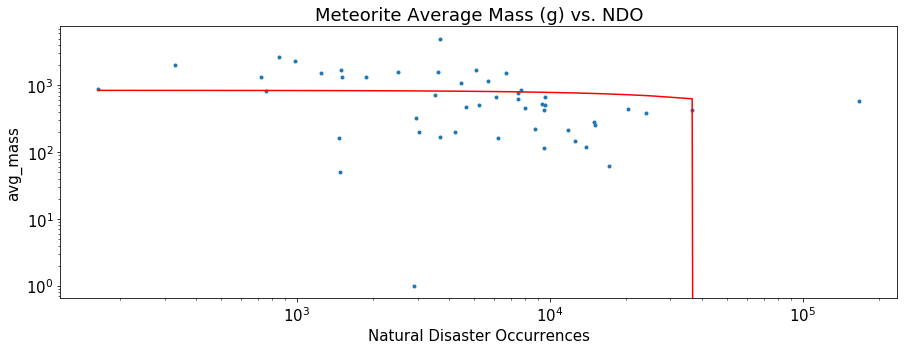

In [46]:
# scatter plot ndo vs avg_mass
x,y = graph('avg_mass', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('avg_mass')
plt.title('Meteorite Average Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Mass

const       6.023429e-08
max_mass    5.478248e-01
dtype: float64


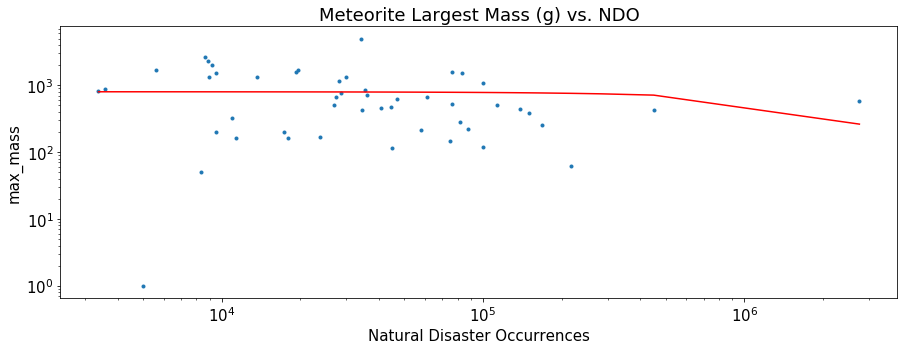

In [47]:
# scatter plot ndo vs max_mass
x,y = graph('max_mass', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('max_mass')
plt.title('Meteorite Largest Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

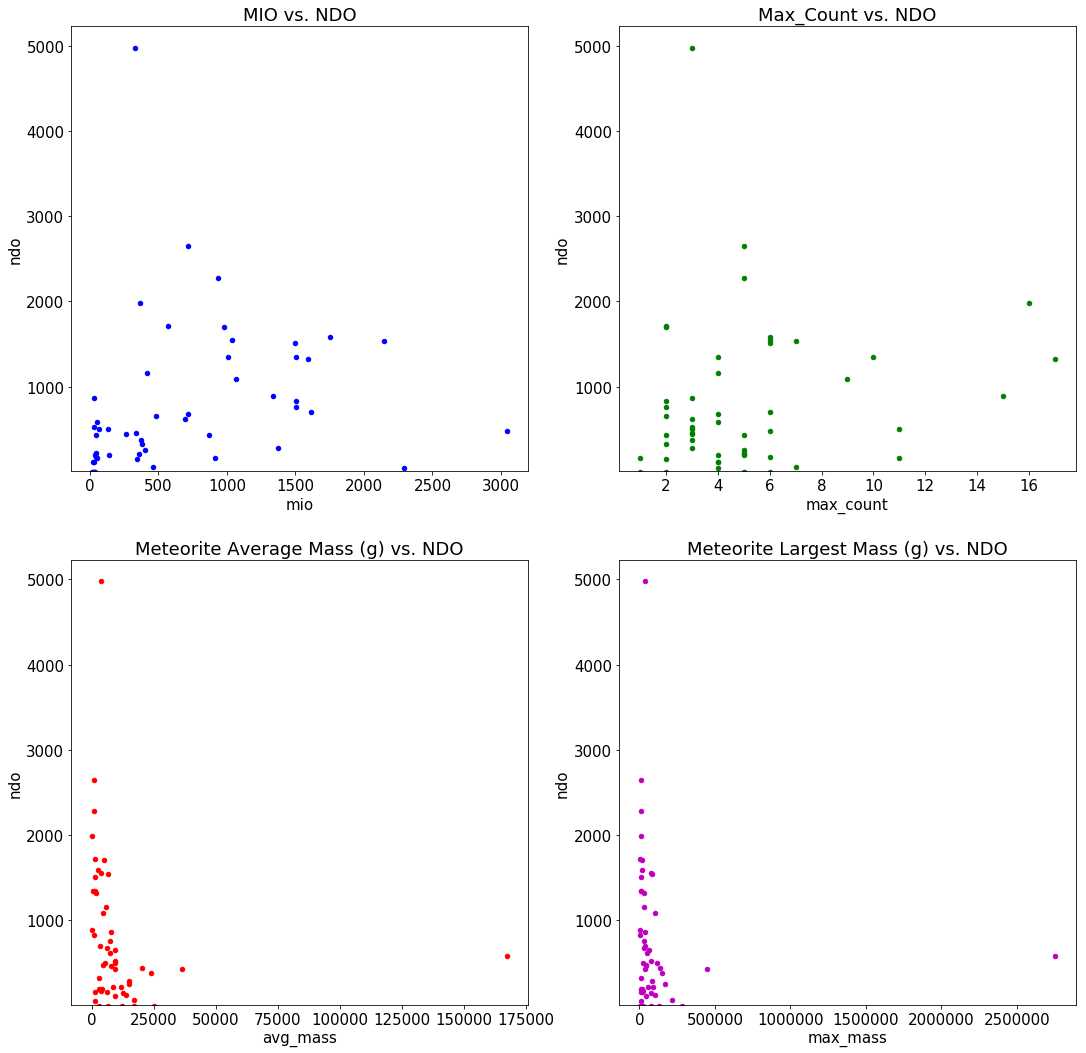

In [48]:
fig, axs = plt.subplots(2,2)

df_final.plot(ax=axs[0][0], x='mio', y='ndo', ylim=10e0, kind='scatter', color='b', title='MIO vs. NDO', figsize=(18,18))
df_final.plot(ax=axs[0][1], x='max_count',y='ndo', ylim=10e0, kind='scatter', color='g', title='Max_Count vs. NDO')
df_final.plot(ax=axs[1][0], x='avg_mass', y='ndo', ylim=10e0, kind='scatter', color='r', title='Meteorite Average Mass (g) vs. NDO')
df_final.plot(ax=axs[1][1], x='max_mass', y='ndo', ylim=10e0, kind='scatter', color='m', title='Meteorite Largest Mass (g) vs. NDO')


## Multiple Linear Regression

In [494]:
# multi regression summary
fit = ols('ndo ~ years + mio', data = df_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     26.10
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.73e-08
Time:                        19:49:13   Log-Likelihood:                -414.69
No. Observations:                  53   AIC:                             835.4
Df Residuals:                      50   BIC:                             841.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.293e+04   1.37e+04     -6.773      0.000    -1.2e+05   -6.54e+04
years         47.3171      6.943      6.815      0.000      33.372      61.262
mio           -0.3201      0.152     -2.104      0.040      -0.626      -0.015
==============================================================================
Omnibus:                       52.579   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.255
Skew:                           2.502   Prob(JB):                     7.11e-73
Kurtosis:                      14.199   Cond. No.                     3.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# multi regression summary
fit = ols('ndo ~ years', data = df_final).fit()
fit.params

Intercept   -75976.220126
years           38.666667
dtype: float64

In [51]:
# multi regression summary
fit = ols('y ~ 1 + mio + max_count:class_name ', data = df_final).fit()
fit.f_pvalue

0.3003962075638139

In [52]:
df_final.columns

Index(['years', 'ndo', 'mio', 'class_name', 'max_count', 'avg_mass',
       'max_mass'],
      dtype='object')

In [563]:
# multi regression summary
fit = ols('ndo ~ 1 + mio', data = df_final).fit()
print(fit.mse_resid/(df_final.shape[0]-1))
print(fit.mse_model/(df_final.shape[0]-1))
print(fit.mse_total/(df_final.shape[0]-1))

14116.887520450155
42900.45416386368
14670.417648208107


### Cross Validation

In [536]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn import cross_validation as CV
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import datasets, linear_model

from sklearn.svm import SVR

# these two lines of codes works
# reg = SVR(C=1., epsilon=0.1, kernel='linear')
# CV.cross_val_score(reg, df_cv['ndo'].values.reshape(-1,1), df_cv['mio'], cv=3)

df_cv = shuffle(df_final)
# clf = svm.SVC(kernel='linear') # this one doesn't seem to work: bad input error

#scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
clf = linear_model.LinearRegression()
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv['mio'], cv=3, scoring='neg_mean_squared_error')
    
print(np.abs(np.mean(scores)))

485187.4403712955


In [537]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv['years'], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

195.23723335451004


In [538]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv['avg_mass'], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

561887481.4728764


In [539]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv[['mio', 'years']], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

242691.33880232504


In [540]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv[['mio', 'avg_mass']], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

281186334.4566239


In [541]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv[['years', 'avg_mass']], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

280943838.3550549


In [542]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv[['mio', 'years', 'avg_mass']], cv=3,  scoring='neg_mean_squared_error')
print(np.abs(np.mean(scores)))

187457621.3834937


0.05927403766776007

## Bootstrap Resampling

In [551]:
# Resample 100 times
nboot = 100
n_samples = df_final.shape[0]
rboot = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + years', data=df_bt).fit(disp=0)
    rboot.append(res.params.years)

mean = np.mean(rboot)
std = np.std(rboot)

print("Mean: %f" % mean)
print("STD: %f" % std)

res.summary()

Mean: 37.721869
STD: 6.156624


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     38.29
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.04e-07
Time:                        20:22:43   Log-Likelihood:                -419.02
No. Observations:                  53   AIC:                             842.0
Df Residuals:                      51   BIC:                             846.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.855e+04   1.28e+04     -6.129      0.000   -1.04e+05   -5.28e+04
years         39.9508      6.457      6.188      0.000      26.989      52.913
==============================================================================
Omnibus:                       53.371   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.255
Skew:                           2.549   Prob(JB):                     4.79e-75
Kurtosis:                      14.358   Cond. No.                     2.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [552]:
# Resample 100 times
nboot = 100
n_samples = df_final.shape[0]
rboot = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + mio', data=df_bt).fit(disp=0)
    rboot.append(res.params.mio)

mean = np.mean(rboot)
std = np.std(rboot)

print("Mean: %f" % mean)
print("STD: %f" % std)

res.summary()

Mean: 0.323522
STD: 0.166778


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.935
Date:                Tue, 04 Dec 2018   Prob (F-statistic):             0.0112
Time:                        20:22:49   Log-Likelihood:                -424.72
No. Observations:                  53   AIC:                             853.4
Df Residuals:                      51   BIC:                             857.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.5682    145.812      3.810      0.000     262.838     848.299
mio            0.4054      0.154      2.633      0.011       0.096       0.714
==============================================================================
Omnibus:                        5.611   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.181
Skew:                           0.766   Prob(JB):                       0.0750
Kurtosis:                       3.031   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [553]:
# Resample 100 times
nboot = 100
threshold = 0.5
n_samples = df_final.shape[0]
rboot = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + avg_mass', data=df_bt).fit(disp=0)
    rboot.append(res.params.avg_mass)

mean = np.mean(rboot)
std = np.std(rboot)

print("Mean: %f" % mean)
print("STD: %f" % std)

res.summary()

Mean: -0.023774
STD: 0.024271


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.771
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.189
Time:                        20:22:54   Log-Likelihood:                -442.92
No. Observations:                  53   AIC:                             889.8
Df Residuals:                      51   BIC:                             893.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1034.5264    160.164      6.459      0.000     712.985    1356.068
avg_mass      -0.0083      0.006     -1.331      0.189      -0.021       0.004
==============================================================================
Omnibus:                       39.803   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.564
Skew:                           2.168   Prob(JB):                     2.19e-25
Kurtosis:                       8.712   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [554]:
# Resample 100 times
nboot = 100
n_samples = df_final.shape[0]
rboot = []
rboot2 = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + years + mio', data=df_bt).fit(disp=0)
    rboot.append(res.params.years)
    rboot2.append(res.params.mio)

mean = np.mean(rboot)
std = np.std(rboot)

mean2 = np.mean(rboot2)
std2  = np.std(rboot2)

print("years Mean: %f" % mean)
print("years STD: %f" % std)
print()
print("mio Mean: %f" % mean2)
print("mio STD: %f" % std2)
res.summary()

years Mean: 46.939932
years STD: 11.135445

mio Mean: -0.339135
mio STD: 0.237489


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     19.32
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           6.06e-07
Time:                        20:23:02   Log-Likelihood:                -425.97
No. Observations:                  53   AIC:                             857.9
Df Residuals:                      50   BIC:                             863.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.067e+05   1.73e+04     -6.154      0.000   -1.42e+05   -7.19e+04
years         54.3428      8.762      6.202      0.000      36.745      71.941
mio           -0.5886      0.191     -3.081      0.003      -0.972      -0.205
==============================================================================
Omnibus:                       39.406   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.778
Skew:                           2.089   Prob(JB):                     9.79e-27
Kurtosis:                       9.065   Cond. No.                     3.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [555]:
# Resample 100 times
nboot = 100
threshold = 0.5
n_samples = df_final.shape[0]
rboot = []
rboot2 = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + years + avg_mass', data=df_bt).fit(disp=0)
    rboot.append(res.params.years)
    rboot2.append(res.params.avg_mass)

mean = np.mean(rboot)
std = np.std(rboot)

mean2 = np.mean(rboot2)
std2  = np.std(rboot2)

print("years Mean: %f" % mean)
print("years STD: %f" % std)
print()
print("avg_mass Mean: %f" % mean2)
print("avg_Mass STD: %f" % std2)
res.summary()

years Mean: 38.089641
years STD: 6.937562

avg_mass Mean: -0.005150
avg_Mass STD: 0.011111


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     24.00
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           4.94e-08
Time:                        20:23:07   Log-Likelihood:                -413.31
No. Observations:                  53   AIC:                             832.6
Df Residuals:                      50   BIC:                             838.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.327e+04   1.19e+04     -6.160      0.000   -9.72e+04   -4.94e+04
years         37.2976      5.979      6.238      0.000      25.289      49.306
avg_mass      -0.0185      0.014     -1.326      0.191      -0.046       0.010
==============================================================================
Omnibus:                       79.720   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1171.629
Skew:                           4.038   Prob(JB):                    3.84e-255
Kurtosis:                      24.571   Cond. No.                     1.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [556]:
# Resample 100 times
nboot = 100
n_samples = df_final.shape[0]
rboot = []
rboot2 = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + avg_mass + mio', data=df_bt).fit(disp=0)
    rboot.append(res.params.avg_mass)
    rboot2.append(res.params.mio)

mean = np.mean(rboot)
std = np.std(rboot)

mean2 = np.mean(rboot2)
std2  = np.std(rboot2)

print("avg_mass Mean: %f" % mean)
print("avg_mass STD: %f" % std)
print()
print("mio Mean: %f" % mean2)
print("mio STD: %f" % std2)
res.summary()

avg_mass Mean: -0.019308
avg_mass STD: 0.023598

mio Mean: 0.239605
mio STD: 0.188024


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     4.592
Date:                Tue, 04 Dec 2018   Prob (F-statistic):             0.0148
Time:                        20:23:11   Log-Likelihood:                -431.17
No. Observations:                  53   AIC:                             868.3
Df Residuals:                      50   BIC:                             874.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    952.4781    236.059      4.035      0.000     478.340    1426.616
avg_mass      -0.0415      0.018     -2.320      0.024      -0.077      -0.006
mio            0.1758      0.186      0.943      0.350      -0.199       0.550
==============================================================================
Omnibus:                       51.619   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.810
Skew:                           2.580   Prob(JB):                     5.18e-58
Kurtosis:                      12.636   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [557]:
# Resample 100 times
nboot = 100
n_samples = df_final.shape[0]
rboot = []
rboot2 = []
rboot3 = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ 1 + years + mio + avg_mass', data=df_bt).fit(disp=0)
    rboot.append(res.params.years)
    rboot2.append(res.params.mio)
    rboot3.append(res.params.avg_mass)

mean = np.mean(rboot)
std = np.std(rboot)

mean2 = np.mean(rboot2)
std2  = np.std(rboot2)

mean3 = np.mean(rboot3)
std3 = np.std(rboot3)

print("years Mean: %f" % mean)
print("years STD: %f" % std)
print()
print("mio Mean: %f" % mean2)
print("mio STD: %f" % std2)
print()
print("avg_mass Mean: %f" % mean3)
print("avg_mas STD: %f" % std3)
res.summary()

years Mean: 47.282875
years STD: 12.125524

mio Mean: -0.362766
mio STD: 0.249287

avg_mass Mean: -0.006125
avg_mas STD: 0.010021


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     16.46
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.57e-07
Time:                        20:23:15   Log-Likelihood:                -423.99
No. Observations:                  53   AIC:                             856.0
Df Residuals:                      49   BIC:                             863.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.213e+05   1.79e+04     -6.768      0.000   -1.57e+05   -8.53e+04
years         61.8334      9.074      6.814      0.000      43.598      80.069
mio           -0.6902      0.194     -3.559      0.001      -1.080      -0.300
avg_mass      -0.0020      0.003     -0.573      0.569      -0.009       0.005
==============================================================================
Omnibus:                       23.481   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.770
Skew:                           1.320   Prob(JB):                     1.15e-10
Kurtosis:                       6.708   Cond. No.                     6.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 53 rows 
n_samples_train, n_samples_test, n_features = 22, 53, 7
np.random.seed(0)
coef = np.random.randn(n_features)
# coef[50:] = 0.0  # only the top ?? features are impacting the model
X = np.random.randn(n_samples_train + n_samples_test, n_features)
y = np.dot(X, coef)

X_train, X_test = df_final['ndo'][:n_samples_train], df_final['ndo'][n_samples_train:]
y_train, y_test = df_final['mio'][:n_samples_train], df_final['mio'][n_samples_train:]

# Compute train and test errors
clf = linear_model.LinearRegression()

clf.fit(X_train.values.reshape(-1,1), y_train)

clf.score(X_train.values.reshape(-1,1), y_train)